In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

## 參考連結

1. 簡短介紹影片 [Merge sort in 3 minutes](https://www.youtube.com/watch?v=4VqmGXwpLqc)
2. 參考程式碼的連結 [Merge sort in Python](https://www.educative.io/edpresso/merge-sort-in-python)


## Merge Sort Introduction

&emsp; Merge Sort被稱為合併演算法。Merge Sort屬於Divide and Conquer演算法，把問題先拆解(divide)成子問題，並在逐一處理子問題後，將子問題的結果合併(conquer)，如此便解決了原先的問題。


## 先畫個圖吧!

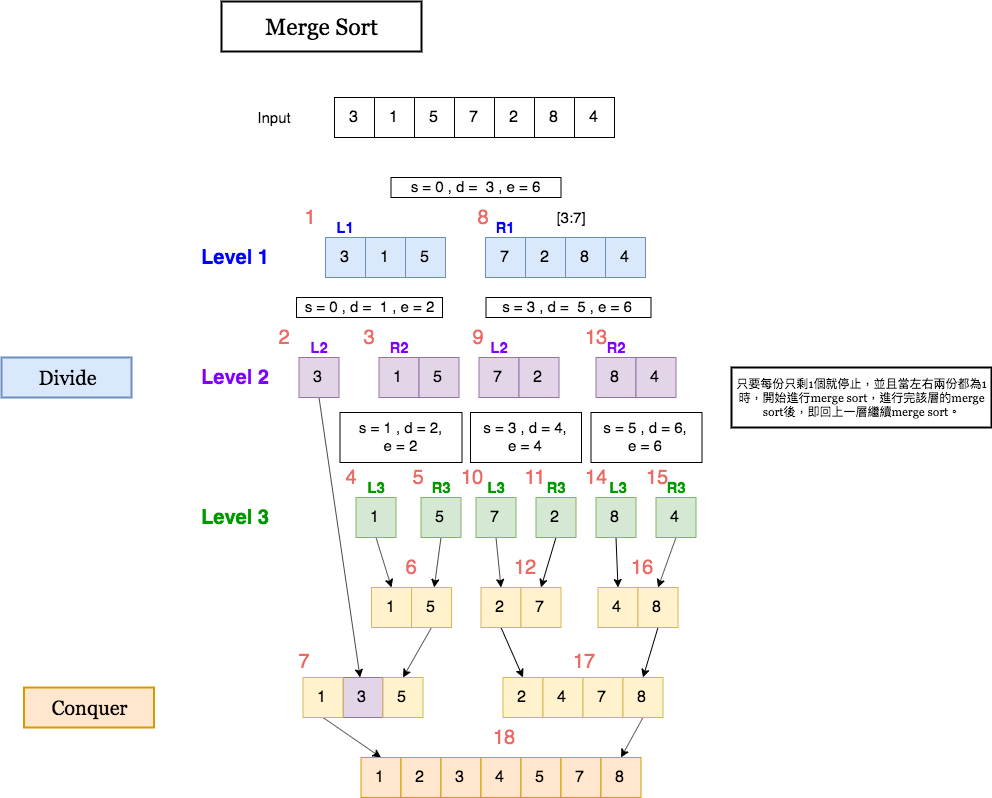

In [1]:
from IPython.display import Image
Image(filename = "MergeSort.png", height = 500, width = 1000)

## 我對Merge Sort的想法：

看完 [MergeSort](https://www.youtube.com/watch?v=4VqmGXwpLqc) 這個影片，我歸納Merge Sort大概是以下幾個步驟：

1. 將array不斷分成2份，直到每1份只剩1個Node。
    + 若array為單數個，例如5個，則分為2和3。


2. 將array組合起來，每次組合2份，且組合排列完Node須由小到大。


3. 以Recursive的方式完成。


## 我想像中的程式碼架構大致會長得像下面這樣

In [ ]:
def MergeSort(array, first, last):
    if first < last:
        middle = last//2
        MergeSort(array, first, middle)
        MergeSort(array, middle + 1, last)
        merge(array, first, middle, last) 

## 參考程式碼

[參考程式碼連結](https://www.educative.io/edpresso/merge-sort-in-python)

In [1]:
def mergeSort(myList):
    if len(myList) > 1:
        print("now array:",myList)
        mid = len(myList) // 2
        left = myList[:mid]
        right = myList[mid:]
        print("before left:",left)
        print("before right:",right)

        # Recursive call on each half
        mergeSort(left)
        mergeSort(right)
        print("after left:", left)
        print("after right", right)
        print("******Start Sort******")

        # Two iterators for traversing the two halves
        i = 0
        j = 0
        
        # Iterator for the main list
        k = 0
        
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
              # The value from the left half has been used
              myList[k] = left[i]
              # Move the iterator forward
              i += 1
            else:
                myList[k] = right[j]
                j += 1
            # Move to the next slot
            k += 1

        # For all the remaining values
        while i < len(left):
            myList[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            myList[k]=right[j]
            j += 1
            k += 1
        
        print("======" , myList , "======")


myList = [54,26,93,17,77,31,44,55,20]
mergeSort(myList)
print(myList)


now array: [54, 26, 93, 17, 77, 31, 44, 55, 20]
before left: [54, 26, 93, 17]
before right: [77, 31, 44, 55, 20]
now array: [54, 26, 93, 17]
before left: [54, 26]
before right: [93, 17]
now array: [54, 26]
before left: [54]
before right: [26]
after left: [54]
after right [26]
******Start Sort******
====== [26, 54] ======
now array: [93, 17]
before left: [93]
before right: [17]
after left: [93]
after right [17]
******Start Sort******
====== [17, 93] ======
after left: [26, 54]
after right [17, 93]
******Start Sort******
====== [17, 26, 54, 93] ======
now array: [77, 31, 44, 55, 20]
before left: [77, 31]
before right: [44, 55, 20]
now array: [77, 31]
before left: [77]
before right: [31]
after left: [77]
after right [31]
******Start Sort******
====== [31, 77] ======
now array: [44, 55, 20]
before left: [44]
before right: [55, 20]
now array: [55, 20]
before left: [55]
before right: [20]
after left: [55]
after right [20]
******Start Sort******
====== [20, 55] ======
after left: [44]
after r

### 第一步：了解Recursive的運作

1. 對照自己畫的圖，去了解Level跑到第幾層了，print出來看看。

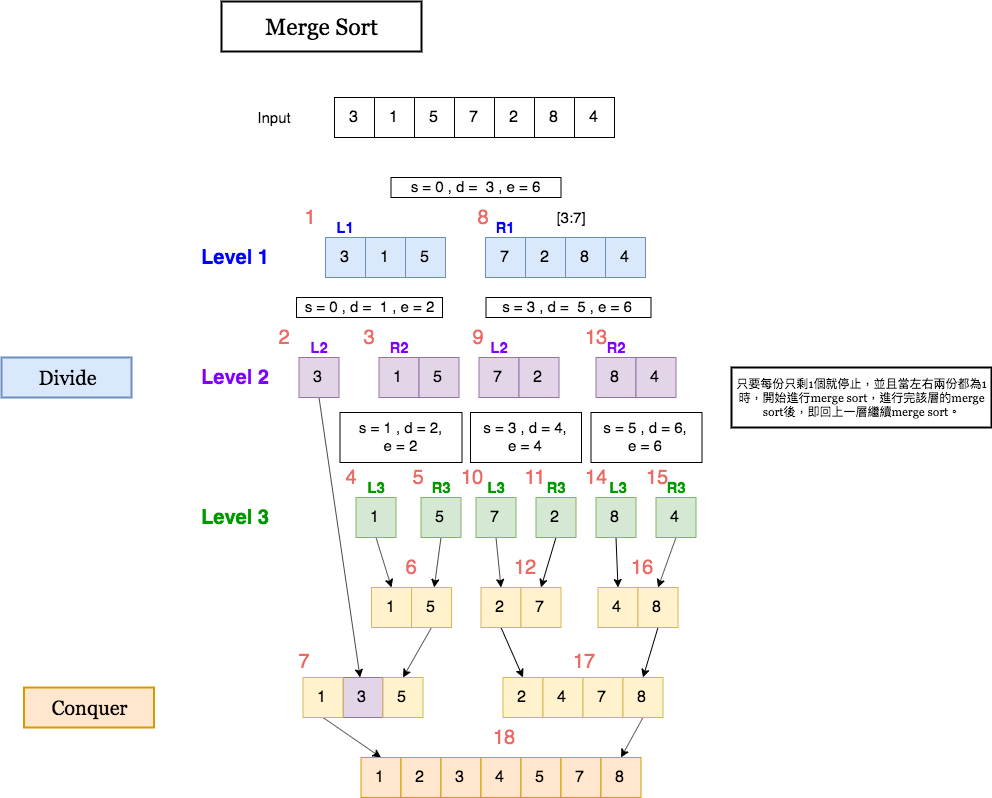

In [2]:
from IPython.display import Image
Image(filename = "MergeSort.png", height = 500, width = 1000)

In [3]:
def mergeSort(myList, level = 1):
    if len(myList) > 1:
        
        mid = len(myList) // 2
        left = myList[:mid]
        right = myList[mid:]
        
        print("Level"+ str(level), "Left:", left ,"Right:",right)
        level = level + 1 # 每往下一層就加1
        
        mergeSort(left, level) # 直到myList的長度不大於1，要將更新過後的level參數一同放入才能看到現在是第幾層
        print("L"+ str(level - 1), "Next Left:",left)
        
        mergeSort(right, level)
        print("R"+ str(level - 1), "Next Right:",right)
        
        print("******Start Sort******")

myList = [3,5,1,7,2,8,4]
mergeSort(myList)


Level1 Left: [3, 5, 1] Right: [7, 2, 8, 4]
Level2 Left: [3] Right: [5, 1]
L2 Next Left: [3]
Level3 Left: [5] Right: [1]
L3 Next Left: [5]
R3 Next Right: [1]
******Start Sort******
R2 Next Right: [5, 1]
******Start Sort******
L1 Next Left: [3, 5, 1]
Level2 Left: [7, 2] Right: [8, 4]
Level3 Left: [7] Right: [2]
L3 Next Left: [7]
R3 Next Right: [2]
******Start Sort******
L2 Next Left: [7, 2]
Level3 Left: [8] Right: [4]
L3 Next Left: [8]
R3 Next Right: [4]
******Start Sort******
R2 Next Right: [8, 4]
******Start Sort******
R1 Next Right: [7, 2, 8, 4]
******Start Sort******


### 大概了解Recursive後，我的想法：
    
1. 我的想法是想先用之前QuickSort的方式，紀錄pointer的移動，並且不斷更新一開始丟進去的array，所以我要寫自己的Recursive方式。
2. 我需要有什麼變數？
    + pointer: 開頭(start), 切割(div), 結尾(end)

In [4]:
# 先嘗試看看能不能把上面Recursive的寫法換成我想要的形式，並且拿我自己畫的圖對照一下。
# 發現print出來跟我寫的index不一樣。
def mergeSort(array, start, end, level = 1): # end要放len(array)
    if len(array) <= 1:
        return array
    if end - start >= 1:
        mid = (start + end) // 2 
        print("Level"+str(level),"start:",start, "mid:",mid , "end:", end)
        level += 1
        mergeSort(array, start, mid, level)
        print("L"+str(level-1),"start:",start, "mid:", mid)
        mergeSort(array, mid + 1, end, level)
        print("R"+str(level-1),"mid:",mid, "end:", end)
        print("======="+"Start Sort"+"========")

myList = [3,1,5,7,2,8,4]
mergeSort(myList, 0, 7)

Level1 start: 0 mid: 3 end: 7
Level2 start: 0 mid: 1 end: 3
Level3 start: 0 mid: 0 end: 1
L3 start: 0 mid: 0
R3 mid: 0 end: 1
=======Start Sort========
L2 start: 0 mid: 1
Level3 start: 2 mid: 2 end: 3
L3 start: 2 mid: 2
R3 mid: 2 end: 3
=======Start Sort========
R2 mid: 1 end: 3
=======Start Sort========
L1 start: 0 mid: 3
Level2 start: 4 mid: 5 end: 7
Level3 start: 4 mid: 4 end: 5
L3 start: 4 mid: 4
R3 mid: 4 end: 5
=======Start Sort========
L2 start: 4 mid: 5
Level3 start: 6 mid: 6 end: 7
L3 start: 6 mid: 6
R3 mid: 6 end: 7
=======Start Sort========
R2 mid: 5 end: 7
=======Start Sort========
R1 mid: 3 end: 7
=======Start Sort========


In [5]:
# 發現上面print出來跟我寫的index不一樣，問題出在MergeSort是切割和QuickSort不一樣，
# QuickSort切割是以節點也就是Pivot切割，但是MergeSort切割是以線切割，所以要換一下公式。
# 結果就可以啦!
# 現在的start. div. end都是該node在array中的index
def mergeSort(array, start, end, level = 1): 
    if len(array) <= 1:
        return array
    if end - start >= 1:
        div = (start + end + 1) // 2 # 改成div，且要以該段待排序的list的長度來除以2
        print("Level"+str(level),"start:",start, "div:",div , "end:", end)
        level += 1
        mergeSort(array, start, div - 1, level) 
        print("L"+str(level-1),"start:",start, "div:", div-1)
        mergeSort(array, div, end, level)
        print("R"+str(level-1),"div:",div, "end:", end)
        print("======="+"Start Sort"+"========")

myList = [3,1,5,7,2,8,4]
mergeSort(myList, 0, 6)

Level1 start: 0 div: 3 end: 6
Level2 start: 0 div: 1 end: 2
L2 start: 0 div: 0
Level3 start: 1 div: 2 end: 2
L3 start: 1 div: 1
R3 div: 2 end: 2
=======Start Sort========
R2 div: 1 end: 2
=======Start Sort========
L1 start: 0 div: 2
Level2 start: 3 div: 5 end: 6
Level3 start: 3 div: 4 end: 4
L3 start: 3 div: 3
R3 div: 4 end: 4
=======Start Sort========
L2 start: 3 div: 4
Level3 start: 5 div: 6 end: 6
L3 start: 5 div: 5
R3 div: 6 end: 6
=======Start Sort========
R2 div: 5 end: 6
=======Start Sort========
R1 div: 3 end: 6
=======Start Sort========


### 第二步：Merge function

1. 參考程式碼並沒有再寫一個merge function，而是將直接寫在原Function裡，但是這部分我看不太懂它儲存排序好的list以及回傳的方式，所以我選擇自己用自己的方式。


2. 排序規則：比較left(左邊array)和right(右邊array)的節點大小。
    + 先將要比較的兩邊array放進left和right這兩個暫存空間儲存起來。
    + 首先設定left和right的pointer，分別是i和j，且起始點 i = j = 0
    + 比較left[i]和right[j]大小，數值較小的直接覆寫掉原本的array中該位置的值，並且pointer+1
    + 當left或right沒有未排序的節點時，自動將另一個array中有未排序的節點覆寫array中原本的值，一樣pointer+1 

In [6]:
def mergeSort(array, start, end, level = 1): 
    if len(array) <= 1:
        return array
    if end - start >= 1:
        div = (start + end + 1) // 2 # 改成div，且要以該段待排序的list的長度來除以2
        print("Level"+str(level),"start:",start, "div:",div , "end:", end)
        level += 1
        mergeSort(array, start, div - 1, level) 
        print("L"+str(level-1),"start:",start, "div:", div-1)
        mergeSort(array, div, end, level)
        print("R"+str(level-1),"div:",div, "end:", end)
        print("======="+"Start Sort"+"========")
        merge(array, start, div, end)
    return array

def merge(array, start, div, end):
    # 先將兩邊array放入left和right的暫存空間裡
    left = array[start : div]
    right = array[div : end + 1]
    
    # 設定left和right的pointer起始值為0
    i = j = 0
    
    # 從start的位置開始更新原本的array
    k = start 
    
    while (i < len(left)) and (j < len(right)):
        if left[i] <= right[j]:
            array[k] = left[i]
            i = i + 1
        else:
            array[k] = right[j]
            j = j + 1
        k = k + 1
    
    while (i < len(left)) and (j >= len(right)):
        array[k] = left[i]
        i = i + 1
        k = k + 1
    
    while (j < len(right)) and (i >= len(left)):
        array[k] = right[j]
        j = j + 1
        k = k + 1
    
    print("array:", array)
    print("+++++++++++++++++")
    return array
    
myList = [3,1,5,7,2,8,4]
mergeSort(myList, 0, 6)

Level1 start: 0 div: 3 end: 6
Level2 start: 0 div: 1 end: 2
L2 start: 0 div: 0
Level3 start: 1 div: 2 end: 2
L3 start: 1 div: 1
R3 div: 2 end: 2
=======Start Sort========
array: [3, 1, 5, 7, 2, 8, 4]
+++++++++++++++++
R2 div: 1 end: 2
=======Start Sort========
array: [1, 3, 5, 7, 2, 8, 4]
+++++++++++++++++
L1 start: 0 div: 2
Level2 start: 3 div: 5 end: 6
Level3 start: 3 div: 4 end: 4
L3 start: 3 div: 3
R3 div: 4 end: 4
=======Start Sort========
array: [1, 3, 5, 2, 7, 8, 4]
+++++++++++++++++
L2 start: 3 div: 4
Level3 start: 5 div: 6 end: 6
L3 start: 5 div: 5
R3 div: 6 end: 6
=======Start Sort========
array: [1, 3, 5, 2, 7, 4, 8]
+++++++++++++++++
R2 div: 5 end: 6
=======Start Sort========
array: [1, 3, 5, 2, 4, 7, 8]
+++++++++++++++++
R1 div: 3 end: 6
=======Start Sort========
array: [1, 2, 3, 4, 5, 7, 8]
+++++++++++++++++


[1, 2, 3, 4, 5, 7, 8]

### 第三步：寫成Class

In [2]:
class Solution(object):
    def merge_sort(self, nums):
        """
        :type nums: List[int] ex:[3,2,-4,6,4,2,19],[5,1,1,2,0,0]
        :rtype: List[int] ex:[-4,2,2,3,4,6,19],[0,0,1,1,2,5]
        """
        self.array = nums
        self.start = 0
        self.end = len(nums)-1
        self.run(self.array, self.start, self.end)
        return self.array
        
    def run(self, array, start, end):
        if len(array) <= 1:
            return self.array
        if end - start >= 1:
            div = (start + end + 1) // 2 # 改成div，且要以該段待排序的list的長度來除以2
            self.run(array, start, div - 1) 
            self.run(array, div, end)
            self.merge(array, start, div, end)
        
    
    def merge(self, array, start, div, end):
        left = array[start : div]
        right = array[div : end + 1]
        
        i = j = 0
        k = start 

        while (i < len(left)) and (j < len(right)):
            if left[i] <= right[j]:
                array[k] = left[i]
                i = i + 1
            else:
                array[k] = right[j]
                j = j + 1
            k = k + 1

        while (i < len(left)) and (j >= len(right)):
            array[k] = left[i]
            i = i + 1
            k = k + 1

        while (j < len(right)) and (i >= len(left)):
            array[k] = right[j]
            j = j + 1
            k = k + 1

output = Solution().merge_sort([11,2,5,7,1,8,15])
output

[1, 2, 5, 7, 8, 11, 15]

### 時間複雜度(Time Complexity)

Best Case：Ο(n)

Worst Case：Ο(n log n)

Average Case：Ο(n log n)